In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 데이터 불러오기
file_path = '../data/statistical_data.csv'
df = pd.read_csv(file_path)

In [4]:
# 데이터 확인
print(df.head(5))  # 상위 5개 행 출력
print(df.info())  # 데이터 타입 및 결측치 확인
print(df.describe())  # 기초 통계 확인

         변수1        변수2 Group
0  40.615756  84.243129    G2
1  42.163078  57.119014    G2
2  50.195508  62.560821    G3
3  55.666544  50.373233    G1
4  50.942369  37.038902    G2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변수1     300 non-null    float64
 1   변수2     300 non-null    float64
 2   Group   300 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.2+ KB
None
              변수1         변수2
count  300.000000  300.000000
mean    49.409910   60.993588
std     15.928850   21.400651
min     -0.461433    4.307287
25%     38.988939   46.297756
50%     49.952510   61.318249
75%     61.434477   76.284587
max     97.805500  119.523939


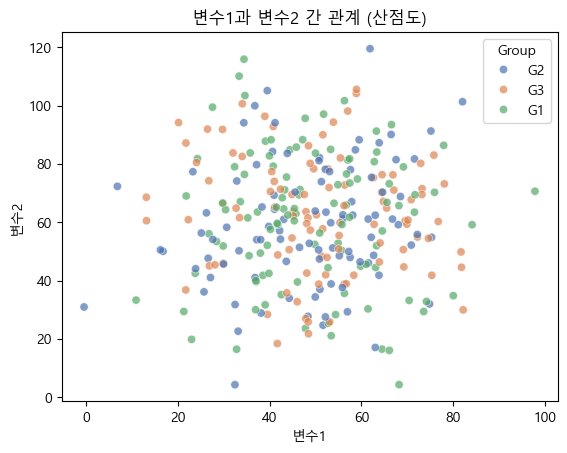

In [6]:
# 1. 변수 간 관계를 산점도로 시각화 ###
plt.plot(figsize=(8, 6))
sns.scatterplot(data=df, x="변수1", y="변수2", hue=df['Group'], palette="deep", alpha=0.7)
plt.title("변수1과 변수2 간 관계 (산점도)")
plt.xlabel("변수1")
plt.ylabel("변수2")
plt.legend(title="Group")
plt.show()

# 해석:
# - 변수1과 변수2 간의 관계를 확인
# - 그룹별로 다른 색을 사용하여 분포를 구분
# - 상관 관계가 있는지 시각적으로 확인 가능

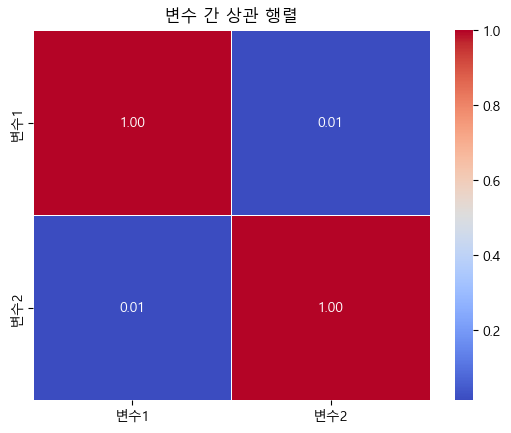

In [8]:
# 2. 변수 간 상관 행렬 및 히트맵
correlation_matrix = df[['변수1', '변수2']].corr()

plt.plot(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("변수 간 상관 행렬")
plt.show()

# 해석:
# - 변수1과 변수2의 상관 계수를 확인
# - 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계
# - 0에 가까우면 상관성이 낮음


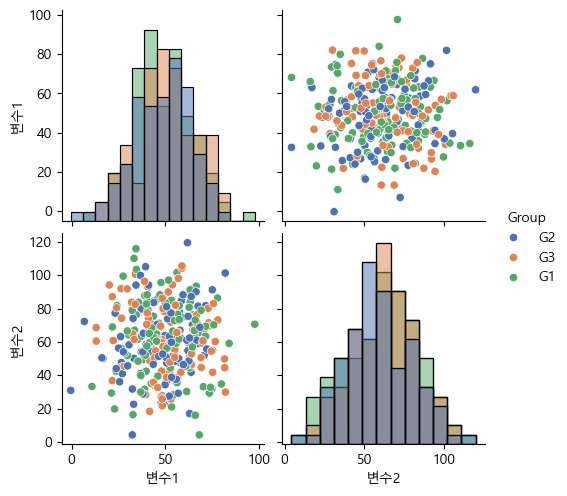

In [9]:
# 3. 변수 간 관계를 그룹별로 시각화 (페어플롯)
sns.pairplot(df, hue="Group", palette="deep", diag_kind="hist")
plt.show()

# 해석:
# - 여러 변수 간의 관계를 한눈에 보기 위한 시각화 기법
# - 같은 변수 간의 히스토그램을 대각선(diagonal)에 표시
# - 산점도와 히스토그램을 함께 제공하여 데이터 패턴을 쉽게 파악 가능

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_21532\2819776123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="변수1", data=df, palette="pastel")
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_21532\2819776123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="변수2", y="Group", data=df, palette="pastel")


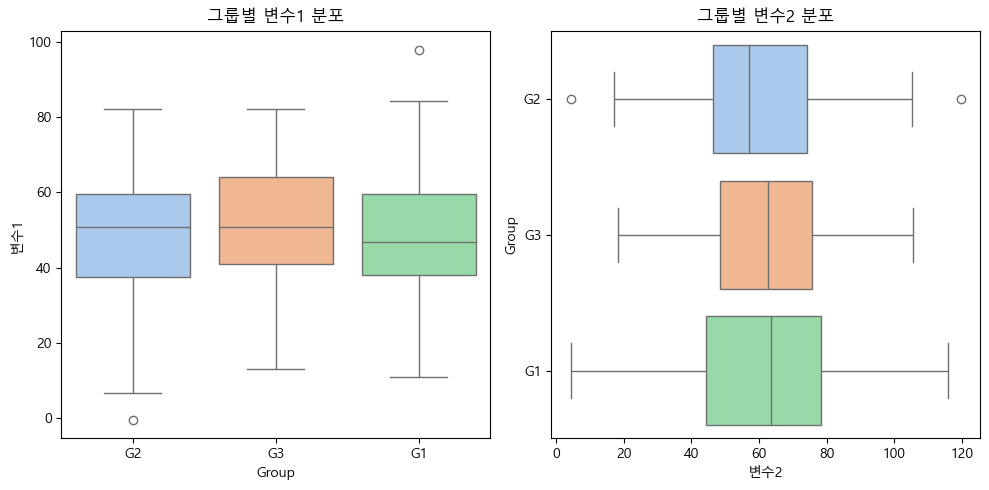

In [ ]:
# 4. 그룹별 변수1과 변수2의 분포 비교 (박스플롯)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="변수1", y="Group", data=df, palette="pastel")
plt.title("그룹별 변수1 분포")

plt.subplot(1, 2, 2)
sns.boxplot(x="변수2", y="Group", data=df, palette="pastel")
plt.title("그룹별 변수2 분포")

plt.tight_layout()
plt.show()

# 해석:
# - 그룹별 변수1과 변수2의 중앙값, 사분위 범위, 이상치를 확인
# - 박스 안은 IQR(Interquartile Range, 사분위 범위)
# - 수염(whisker)은 데이터 분포의 범위를 나타냄
# - 박스 밖 점들은 이상치(Outliers)를 의미할 수 있음